In [265]:
import matplotlib.pylab as plt
import numpy as np
from osgeo import gdal
import osr

# from scipy import misc
# raster = misc.imread('HillslopeOnlyVeg.tif')

In [266]:
%matplotlib inline

In [267]:
image = np.flipud(plt.imread('../FourierWindowMethodMATLAB/ExamplePattern2.tiff'))
# image[image != 0] = 1
TI = image.copy()
# image = image[:50, 100:150]

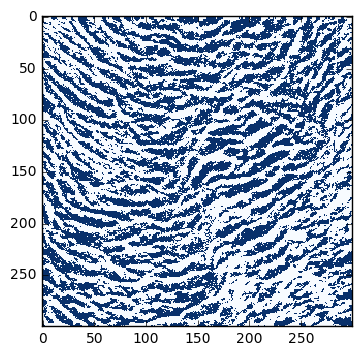

In [268]:

plt.imshow(TI, cmap = 'Blues', interpolation  = 'none')

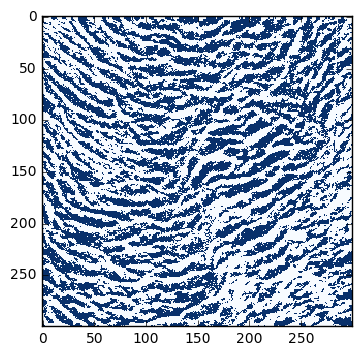

In [269]:

plt.imshow(image, cmap = 'Blues', interpolation  = 'none')

In [270]:
import scipy.io as sio

In [271]:
rot = sio.loadmat('../FourierWindowMethodMATLAB/dir.txt')['dir']
# rot = rot[50:-50, 50:-50]

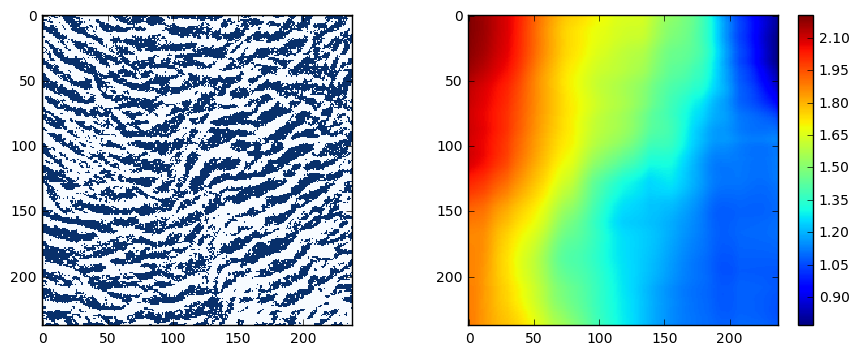

In [272]:
fig = plt.figure(figsize = (11, 4))
plt.subplot(121)

plt.imshow(TI[31:-31, 31:-31], cmap = 'Blues', interpolation  = 'none')

plt.subplot(122)
plt.imshow(rot[31:-31, 31:-31], interpolation = 'none')
plt.colorbar()


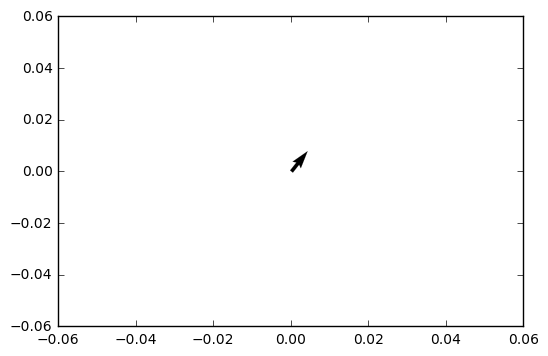

In [273]:
theta = 0.9 #np.pi/2
plt.quiver(np.cos(theta), np.sin(theta), lw =.1)

In [274]:
# U =  np.sin(rot[31:41, 31:41])
# V = np.cos(rot[31:41, 31:41])
# plt.imshow(TI[30:-30, 30:-30], interpolation = 'none')
# plt.colorbar()
# plt.quiver(U,V )


In [256]:

Nx = image.shape[1]
Ny = image.shape[0]

In [150]:
f = open("ti.gslib", "w")
f.write('{0} {0} 1 1 1 1 0 0 0\n'.format(Nx, Ny))
f.write('1\n')
f.write('veg\n')
count = 0
for i in range(Ny):
    for j in range(Nx):
        f.write('{}\n'.format(str(image[i,j])))
        count+= 1

In [151]:
f = open("rot.gslib", "w")
f.write('{0} {0} 1 1 1 1 0 0 0\n'.format(rot.shape[0], rot.shape[1]))
f.write('1\n')
f.write('veg\n')
count = 0
for i in range(rot.shape[0]):
    for j in range(rot.shape[1]):
        f.write('{}\n'.format(str(rot[i,j]*2)))
        count += 1

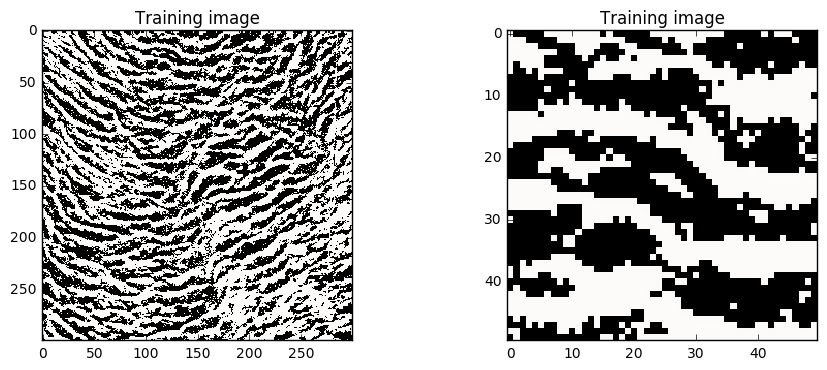

In [259]:
# 1. DEM of the hillslope (HillslopeDEM.tif).

plt.figure(figsize = (11, 4))
plt.subplot(121)
plt.imshow(TI,
           cmap='gist_earth_r', interpolation='none')
plt.title('Training image')
plt.subplot(122)
plt.imshow(image,
           cmap='gist_earth_r', interpolation='none')
plt.title('Training image')
        
# 2.  A slope inclination layer (Dem_Slope.tif)


In [260]:
def openfile(fname):
    f =  open(fname, 'r')

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]

    Nx = int(a[0])
    Ny = int(a[1])
    Nz = int(a[2])

    Sx = float(a[3])
    Sy = float(a[4])
    Sz = float(a[5])

    Ox = float(a[6])
    Oy = float(a[7])
    Oz = float(a[8])

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]
    nvar = int(a[0])

    line = f.next()
    a = (line.strip().split(" "))
    a = [b for b in a if b]
    name_of_variable_1 = (a[0])
    print name_of_variable_1,
    
    facies = np.zeros([Nx, Ny])
    for i in range(Ny):
        for j in range(Nx):
            facies[i, j] = int(f.next().split()[0])
            
    return facies, Nx, Ny

In [261]:
rot_test, nx,ny = openfile("rotated/test_real00000.gslib")
test, nx,ny = openfile("output/test_real00000.gslib")

veg_real00000 veg_real00000


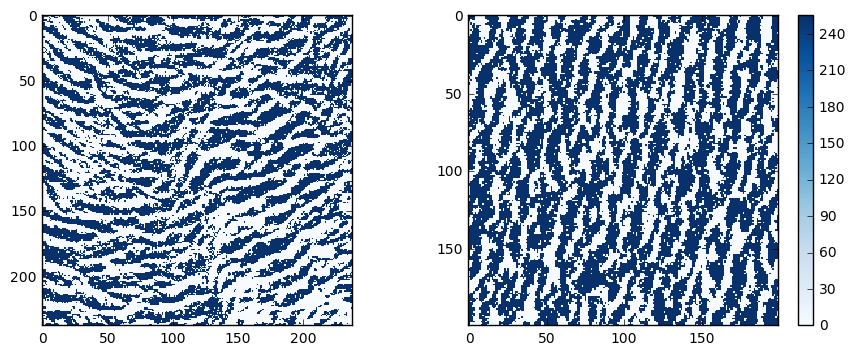

In [264]:
fig = plt.figure(figsize = (11, 4))
plt.subplot(121)

plt.imshow(TI[31:-31, 31:-31], cmap = 'Blues', interpolation  = 'none')

plt.subplot(122)
plt.imshow(rot_test,  cmap = 'Blues',  interpolation = 'none')
plt.colorbar()


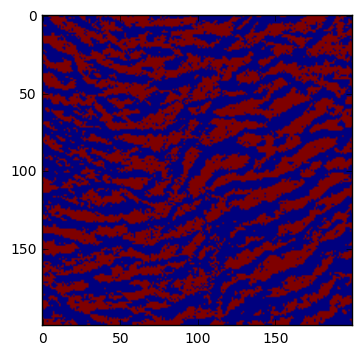

In [262]:
plt.imshow(TI[50:-50,50:-50])

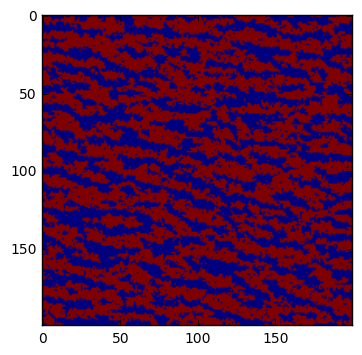

In [170]:
plt.imshow(test)

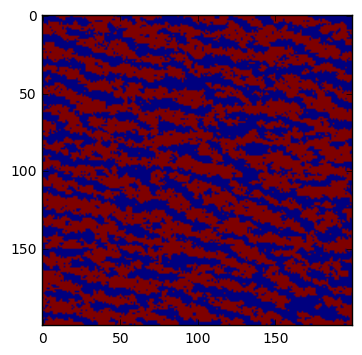

In [171]:
plt.imshow(rot_test)